In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('covid19-A.csv')
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,1/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [12]:
data = df[['country', 'date', 'code', 'population', 
                      'hosp_patients', 'hosp_patients_per_million', 
                      'icu_patients', 'icu_patients_per_million']]
print(data)


           country        date code  population  hosp_patients  \
0      Afghanistan    1/1/2020  AFG  40578846.0            NaN   
1      Afghanistan    1/2/2020  AFG  40578846.0            NaN   
2      Afghanistan    1/3/2020  AFG  40578846.0            NaN   
3      Afghanistan    1/4/2020  AFG  40578846.0            NaN   
4      Afghanistan    1/5/2020  AFG  40578846.0            NaN   
...            ...         ...  ...         ...            ...   
30539   Azerbaijan  11/28/2024  AZE  10295307.0            NaN   
30540   Azerbaijan  11/29/2024  AZE  10295307.0            NaN   
30541   Azerbaijan  11/30/2024  AZE  10295307.0            NaN   
30542   Azerbaijan   12/1/2024  AZE  10295307.0            NaN   
30543   Azerbaijan  12/31/2024  AZE  10295307.0            NaN   

       hosp_patients_per_million  icu_patients  icu_patients_per_million  
0                            NaN           NaN                       NaN  
1                            NaN           NaN           

In [47]:
import pandas as pd

data_join = pd.merge(hospital_df, country_df, on='code', how='left')


data_join_clean = data_join.dropna()


country_df = data_join_clean[['code', 'country']].drop_duplicates()

hospital_df = data_join_clean[['code', 'date', 'hosp_patients', 'hosp_patients_per_million', 
                               'icu_patients', 'icu_patients_per_million']].drop_duplicates()

hospital_melted = pd.melt(hospital_df, id_vars=['code', 'date'], 
                          value_vars=['hosp_patients', 'hosp_patients_per_million', 'icu_patients', 'icu_patients_per_million'],
                          var_name='indicator', value_name='value')

print("DataFrame country:")
print(country_df.head())

print("\nDataFrame hospital (melted):")
print(hospital_melted.head())


DataFrame country:
     code    country
0     AUS  Australia
1347  AUT    Austria

DataFrame hospital (melted):
  code       date      indicator  value
0  AUS  3/31/2020  hosp_patients  426.0
1  AUS   4/1/2020  hosp_patients  441.0
2  AUS   4/2/2020  hosp_patients  415.0
3  AUS   4/3/2020  hosp_patients  457.0
4  AUS   4/4/2020  hosp_patients  490.0


In [45]:

data_join = pd.merge(hospital_df, country_df, on='code', how='left')

max_hosp_patients = data_join.groupby('country')['hosp_patients'].idxmax()

result = data_join.loc[max_hosp_patients, ['country', 'date', 'hosp_patients']]
result = result.sort_values(by='hosp_patients', ascending=False)
print(result)


        country        date  hosp_patients
846   Australia   7/25/2022         5571.0
1584    Austria  11/24/2020         4689.0


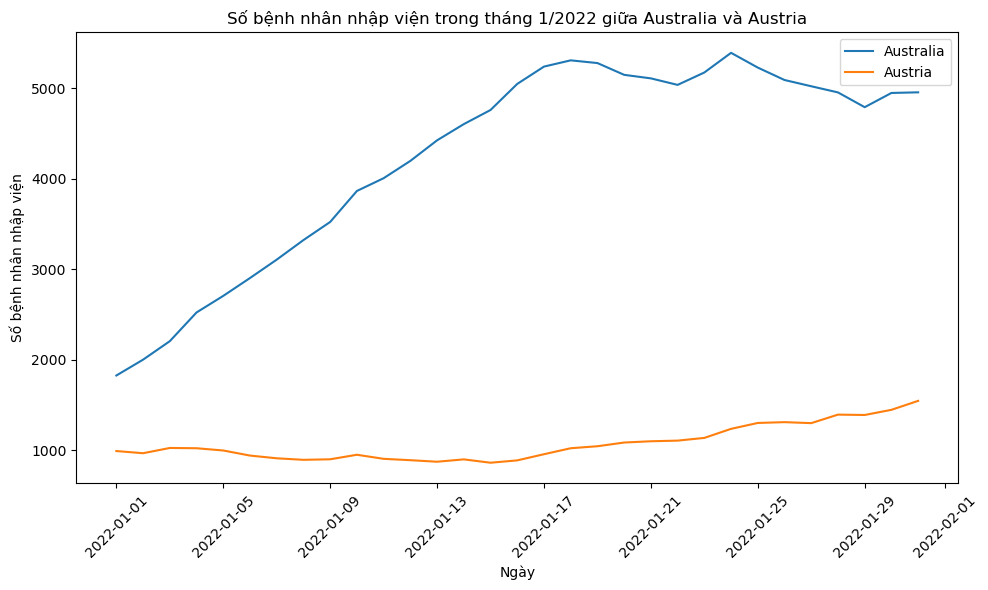

In [46]:

data_join = pd.merge(hospital_df, country_df, on='code', how='left')

data_join['date'] = pd.to_datetime(data_join['date'])

filtered_data = data_join[(data_join['date'].dt.month == 1) & (data_join['date'].dt.year == 2022)]
filtered_data = filtered_data[filtered_data['country'].isin(['Australia', 'Austria'])]

hospital_monthly = filtered_data.groupby(['country', 'date'])['hosp_patients'].sum().reset_index()

plt.figure(figsize=(10, 6))
for country in ['Australia', 'Austria']:
    country_data = hospital_monthly[hospital_monthly['country'] == country]
    plt.plot(country_data['date'], country_data['hosp_patients'], label=country)

plt.title('Số bệnh nhân nhập viện trong tháng 1/2022 giữa Australia và Austria')
plt.xlabel('Ngày')
plt.ylabel('Số bệnh nhân nhập viện')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
import pandas as pd

data = pd.read_csv("covid19-A.csv")
data.head()

data_col = "country, date, code, population, hosp_patients, hosp_patients_per_million, icu_patients, icu_patients_per_million".split(", ")

data = data[data_col]

country = data[["code","country","population"]]
country.dropna(inplace= True)
country.drop_duplicates()
country.isnull().values.any()


data_col.remove("country")
data_col.remove("population")

hospital = data[data_col]
hospital.head()

hospital_melt = pd.melt(hospital, ["date","code"],var_name = "case", value_name= "number_per_case")
hospital_melt.head()

hospital_melt.dropna(subset = ["number_per_case"], how = "all", inplace = True)
hospital_melt.head()

hospital_melt.drop_duplicates(inplace = True, subset = "date")

alldata = country.merge(hospital_melt, on = "code")
alldata.head()

hosp_patients_data = alldata[alldata.case ==  "hosp_patients"]
hosp_patients_data.head()

country_patients =  hosp_patients_data.groupby("country").number_per_case.max()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2920\3680859769.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country.dropna(inplace= True)
